 # <span style="color: blue;"> NAME : Kanika Gulati               PRN -21070126046</span>

 # <span style="color: red;"> Sampling and quantization</span>

Saving edbe73998375dbd76c83924f15c880aa.jpg to edbe73998375dbd76c83924f15c880aa (1).jpg


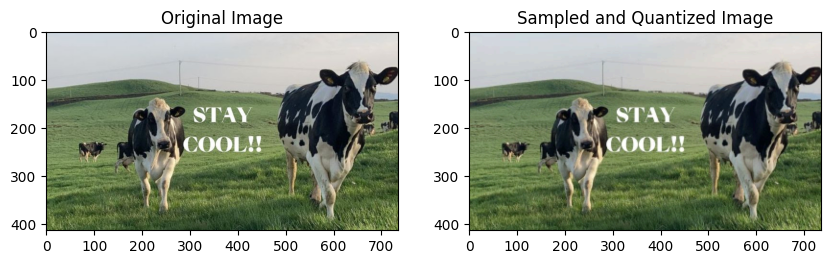

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def sample_and_quantize(image, sampling_factor=2, quantization_levels=64):
    # Sampling: Reduce the resolution of the image
    height, width = image.shape[:2]
    sampled_image = cv2.resize(image, (width // sampling_factor, height // sampling_factor), interpolation=cv2.INTER_LINEAR)

    # Quantization: Reduce the number of colors
    # Normalize the pixel values to [0, 1] range, multiply by the quantization levels,
    # and then divide by the quantization levels to get the new pixel values
    max_val = 255
    quantized_image = np.floor(sampled_image * (quantization_levels / (max_val + 1))) * (max_val / (quantization_levels - 1))
    quantized_image = quantized_image.astype(np.uint8)

    # Resize quantized image back to original dimensions for comparison
    sampled_quantized_image = cv2.resize(quantized_image, (width, height), interpolation=cv2.INTER_NEAREST)

    return sampled_quantized_image

# Upload an image from your local system
uploaded = files.upload()

# Check if any file is uploaded
if len(uploaded) == 0:
    print("No file uploaded.")
else:
    # Load the uploaded image
    file_name = next(iter(uploaded))
    image_bytes = uploaded[file_name]
    image_np = cv2.imdecode(np.frombuffer(image_bytes, np.uint8), cv2.IMREAD_COLOR)

    # Check if the image is loaded successfully
    if image_np is None:
        print(f"Failed to load image: {file_name}")
    else:
        # Perform sampling and quantization
        sampled_quantized_image = sample_and_quantize(image_np, sampling_factor=2, quantization_levels=64)

        # Display the original and processed images
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')

        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(sampled_quantized_image, cv2.COLOR_BGR2RGB))
        plt.title('Sampled and Quantized Image')

        plt.show()
